## Load and set up images

In [60]:
%matplotlib widget
import numpy as np
import xarray as xr
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from frat import frt

In [2]:
nc_fn = "E:/research_data/2022_harmonic_gravity_waves/preprocessed_images/bore_ex.nc"
ds = xr.open_dataset(nc_fn)
ds['time'] = pd.to_datetime(ds.time)

For easy examples 1 and 3, slice to [:, :2500].

In [3]:
easy_examples = [
    '2018-05-13T17:16',
    '2018-05-19T06:06',
    '2018-08-15T05:05',
    '2019-06-09T07:51',
    '2019-06-09T08:41',
    '2019-07-04T13:25',
    '2019-07-06T12:50',
    '2019-07-06T13:41',
    '2020-06-16T15:38',
]

In [4]:
ds.rad255.shape

(2304, 4064, 61)

In [29]:
img_array = ds.sel(time=easy_examples[3]).rad255.values

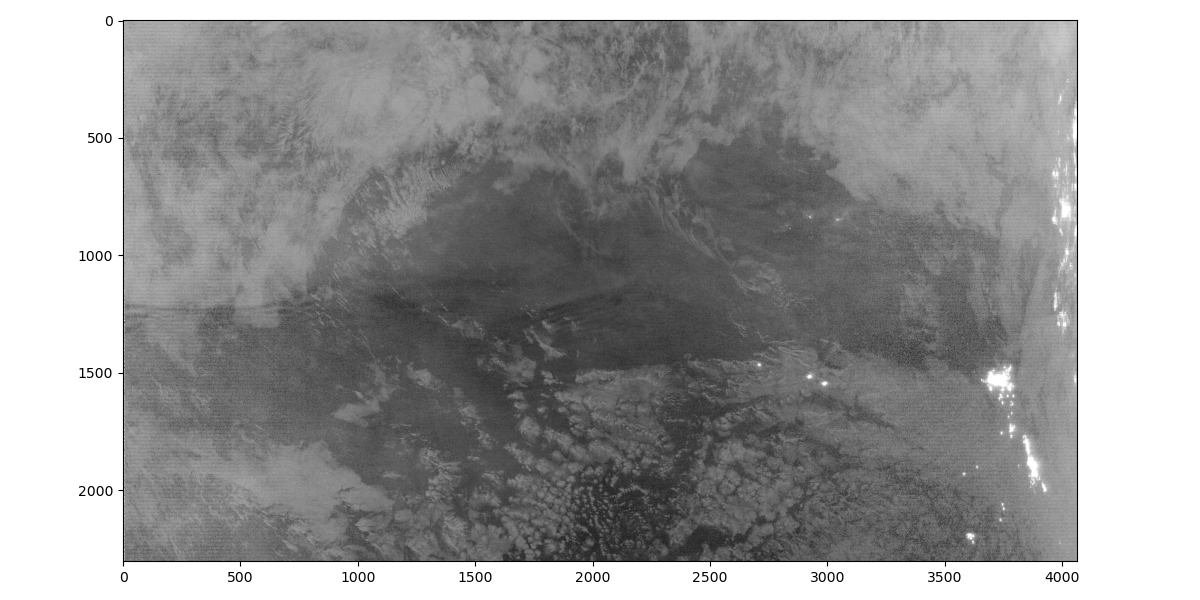

In [30]:
F, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.imshow(img_array, cmap='gray', clim=(0, 255))
F.tight_layout()

For example 0, img_crop starts at (y=1700, x=2300) <br>
For example 1, img_crop starts at (y=2000, x=1740) <br>
For example 3, img_crop starts at (y=1200, x=1800)

In [77]:
img_crop = img_array[1200:1349, 1800:1949, 0]

In [78]:
img_crop.shape

(149, 149)

In [79]:
crop_frt = frt(folded=False)
frt_sino = crop_frt.fit_transform(img_crop)

In [80]:
frt_sino.shape

(149, 150)

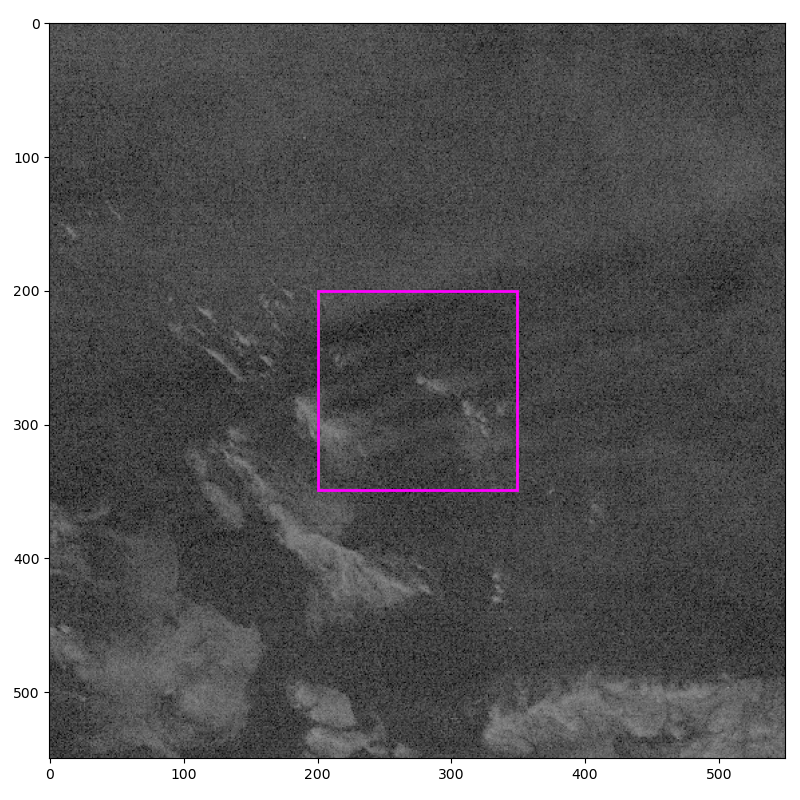

In [75]:
F, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(img_array[1000:1550, 1600:2150], cmap='gray', clim=(0, 255))
rect = patches.Rectangle((200, 200), 149, 149, facecolor='none', edgecolor='magenta', lw=2)
ax.add_patch(rect)
F.tight_layout()

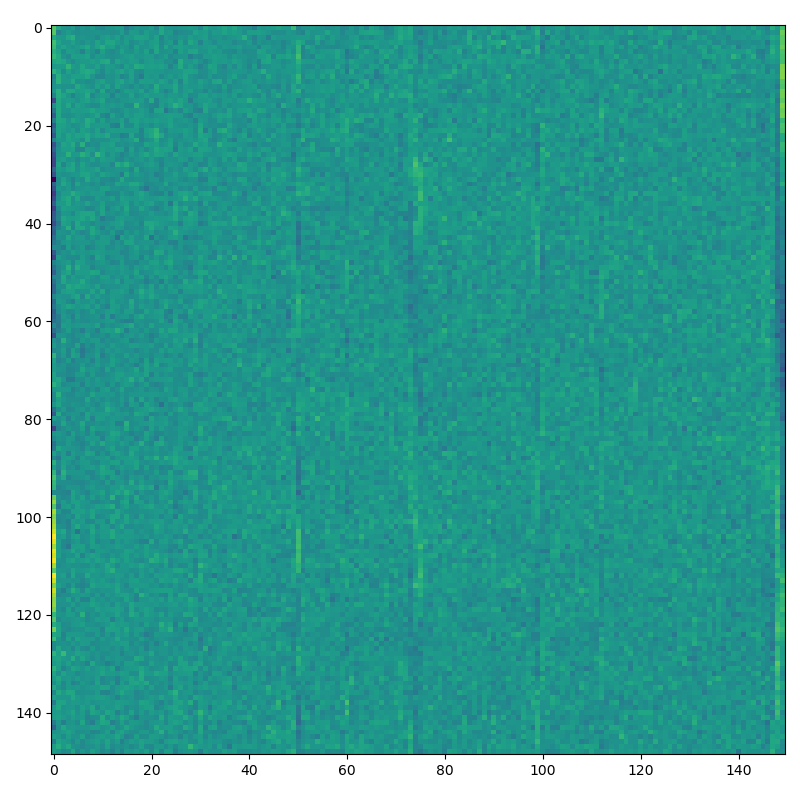

In [81]:
F, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(frt_sino)
F.tight_layout()

In [82]:
img_crop_recon = crop_frt.inv_transform(frt_sino)

In [83]:
img_crop_recon.shape

(149, 149)

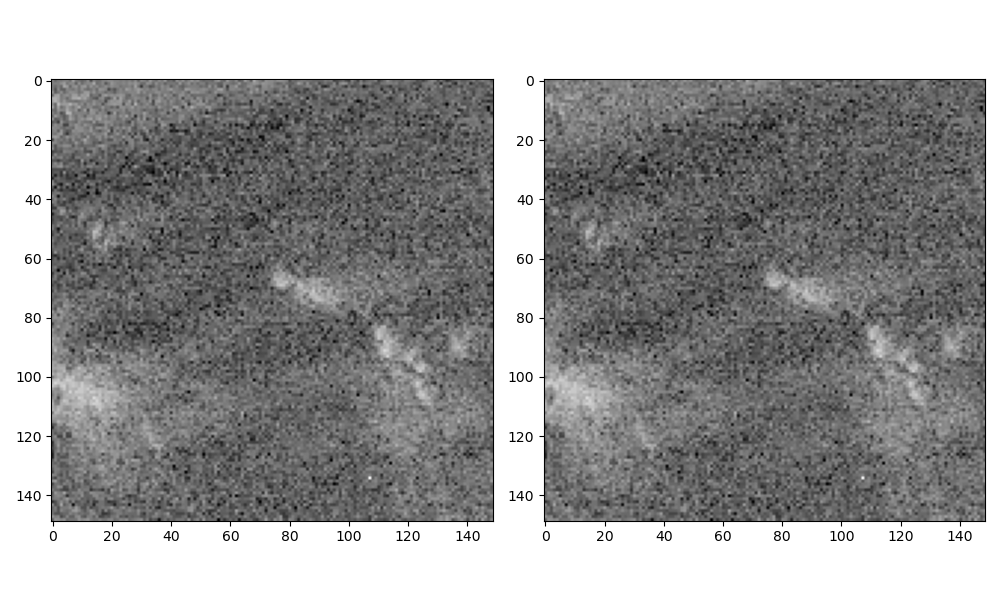

In [84]:
F, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(img_crop, cmap='gray')
ax[1].imshow(img_crop_recon, cmap='gray')
F.tight_layout()

[-1.0, 3.0]
0.3217505543966422


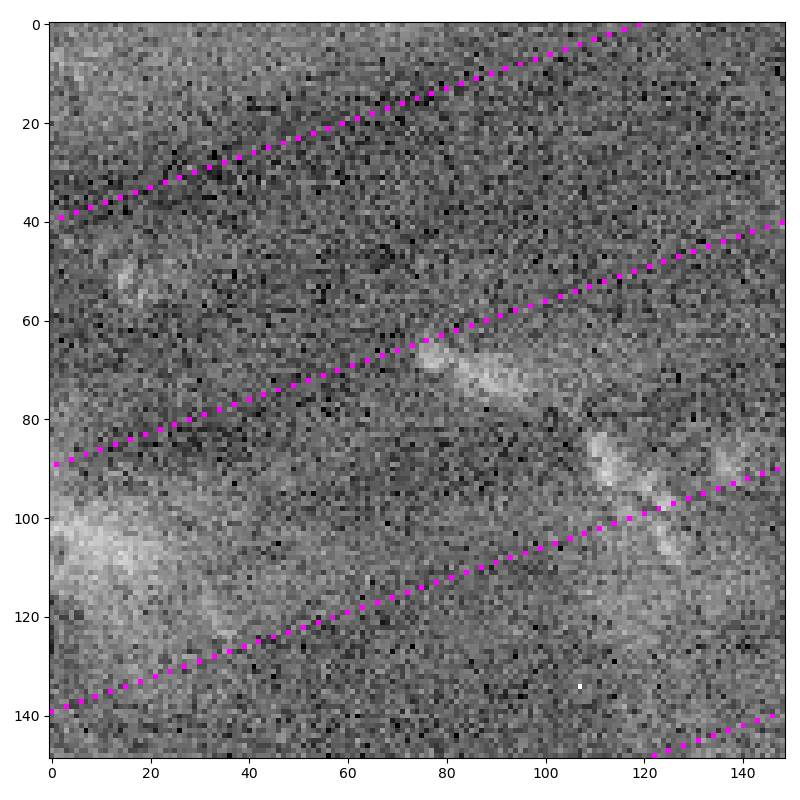

In [85]:
# For pi/3 angle with scale = 2, n_vec 2 and 76 are of interest
# For pi/3 angle with scale = 3, n_vec 101 is the primary of interest, with n_vecs 2, 51, and 52 as secondary 
F, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(img_crop, cmap='gray')

check = 50
n_vec = crop_frt.n_vecs[check]
print(n_vec)
print(np.arctan(-n_vec[0]/n_vec[1]))
# print(np.pi - np.arctan(-n_vec[0]/n_vec[1]))
lines_ex = np.empty((149, 149))
# first_col = np.arange(149)[::-1]
first_col = np.zeros(149)
first_col[-10] = 1
if n_vec[1] != 0:
    lines_ex[:, 0] = first_col
    x_step = n_vec[1]
    y_step = -n_vec[0]
    for i in range(1, 149):
        lines_ex[:, int(i * x_step) % 149] = np.roll(first_col, -int(i * y_step) % 149)
ax.imshow(lines_ex, alpha=lines_ex, cmap='cool')

F.tight_layout()

In [20]:
err = img_crop - img_crop.mean() - img_crop_recon

In [21]:
err.min()

3.197442310920451e-13

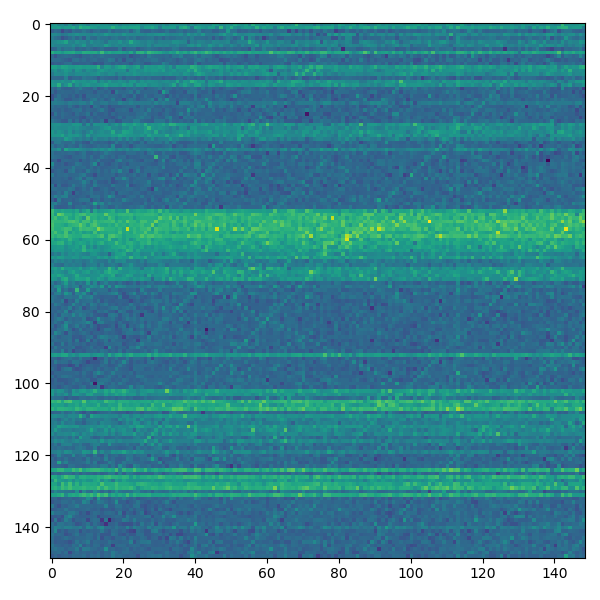

In [22]:
F, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(err, cmap='viridis')
F.tight_layout()

In [23]:
w = pywt.Wavelet('db3')
w.filter_bank

([0.03522629188570953,
  -0.08544127388202666,
  -0.13501102001025458,
  0.45987750211849154,
  0.8068915093110925,
  0.33267055295008263],
 [-0.33267055295008263,
  0.8068915093110925,
  -0.45987750211849154,
  -0.13501102001025458,
  0.08544127388202666,
  0.03522629188570953],
 [0.33267055295008263,
  0.8068915093110925,
  0.45987750211849154,
  -0.13501102001025458,
  -0.08544127388202666,
  0.03522629188570953],
 [0.03522629188570953,
  0.08544127388202666,
  -0.13501102001025458,
  -0.45987750211849154,
  0.8068915093110925,
  -0.33267055295008263])